#### Boot cell

Skip if `module_update.py` is in same folder as notebook, next cell downloads this file which in turn will download other files.

In [13]:
! curl -s "https://raw.githubusercontent.com/Yoonsen/Modules/master/module_update.py" > "module_update.py"

#### Get essentials

Import text and graph modules for analysis, and css for display

In [14]:
from module_update import update, css, code_toggle, printmd

In [15]:
css()

### Start med å importere modulene

In [16]:
update('graph_networkx_louvain', overwrite=True)
update('nbtext', overwrite=True)
import nbtext as nb
import graph_networkx_louvain as gnl
import networkx as nx
from graph_networkx_louvain import cutdown, make_collocation_graph
from collections import Counter

Updated file `C:\Users\larsj\Documents\Notebookprosjekter\graph_networkx_louvain.py`

Updated file `C:\Users\larsj\Documents\Notebookprosjekter\nbtext.py`

# Aggregerte data, trendlinjer og ordmodeller fra ngram




### Trendlinjer 

Data inntil trigram.

In [17]:
nb.nb_ngram("spise middag, lage middag", years=(1990, 2010), smooth=1).head()

,spise middag,lage middag
1990,0.000283,0.000057
1991,0.000372,0.000074
1992,0.000202,0.000042
1993,0.000186,0.000048
1994,0.000146,0.000037


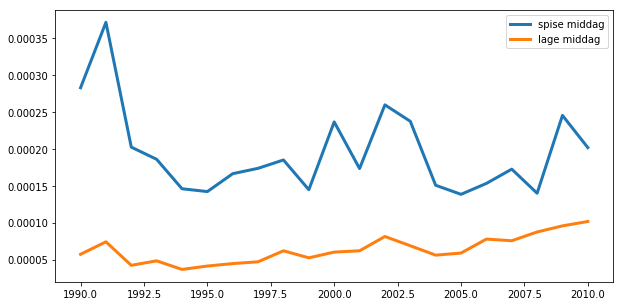

In [18]:
nb.nb_ngram("spise middag, lage middag", years=(1990, 2010), smooth=1).plot(figsize=(10,5), lw=3)

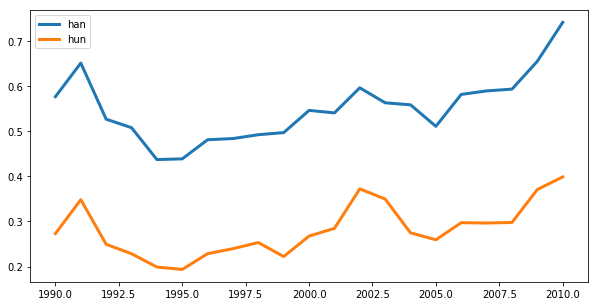

In [19]:
nb.nb_ngram("han, hun", years=(1990, 2010), smooth=1).plot(figsize=(10,5), lw=3)

### Ordmodeller

Enkeltord - kapitaliseringssensitiv

In [20]:
G = nb.make_graph('is', cutoff = 10)

C:\Users\larsj\AppData\Local\Continuum\anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


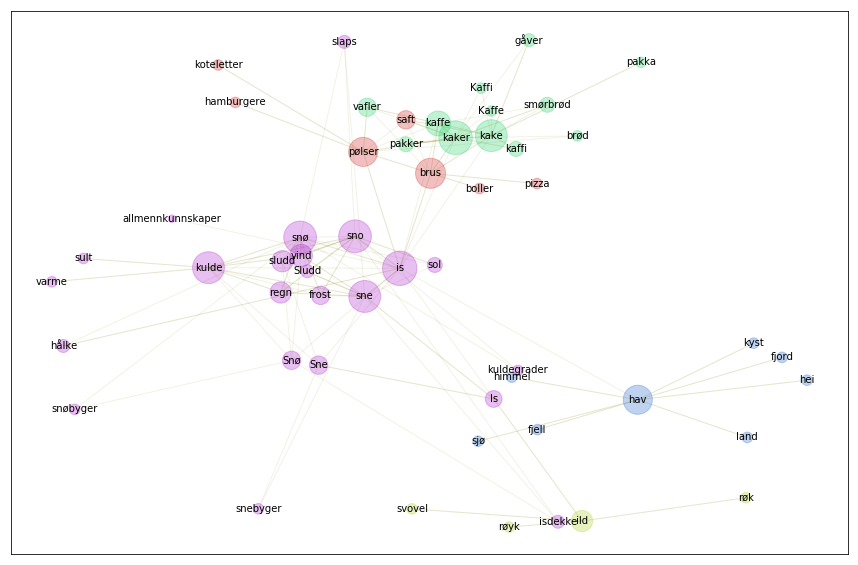

In [21]:
gnl.show_graph(G, spread = 1.9)

In [22]:
gnl.show_communities(G)

ild-røyk :  ild, røyk, svovel, røk

kaker-kake :  kaker, kake, kaffe, vafler, smørbrød, pakker, kaffi, gåver, pakka, brød, Kaffi, Kaffe

hav-fjord :  hav, fjord, himmel, sjø, land, kyst, fjell, hei

is-snø :  is, snø, sno, sne, kulde, vind, regn, sludd, frost, Snø, Sne, Is, sol, slaps, Sludd, isdekke, hålke, snebyger, snøbyger, varme, sult, kuldegrader, allmennkunnskaper

brus-pølser :  brus, pølser, saft, koteletter, pizza, hamburgere, boller



## Kollokasjoner

Definer et korpus - hent data fra dewey for eksempel

In [23]:
korpus = nb.get_urn({'emne':'vinter', 'limit':100, 'year':1990, 'next':30})

In [24]:
coll = nb.urn_coll('snø', urns= korpus, before=4, after=4)

In [25]:
coll.sort_values(by=0, ascending=False).head(20)

,0
.,51
og,41
",",40
på,19
i,18
for,16
det,16
av,15
som,14
eller,12


Sammenling korpuset med en referanse, her tar vi hele bokhylla

In [26]:
totalen = nb.frame(nb.totals(5000))
totalen.head()

,0
.,1265723110
",",1105303412
og,543432056
i,460246057
det,273411583




## Ordskyer

In [31]:
diff = (coll**1.01/totalen).sort_values(by=0, ascending = False)

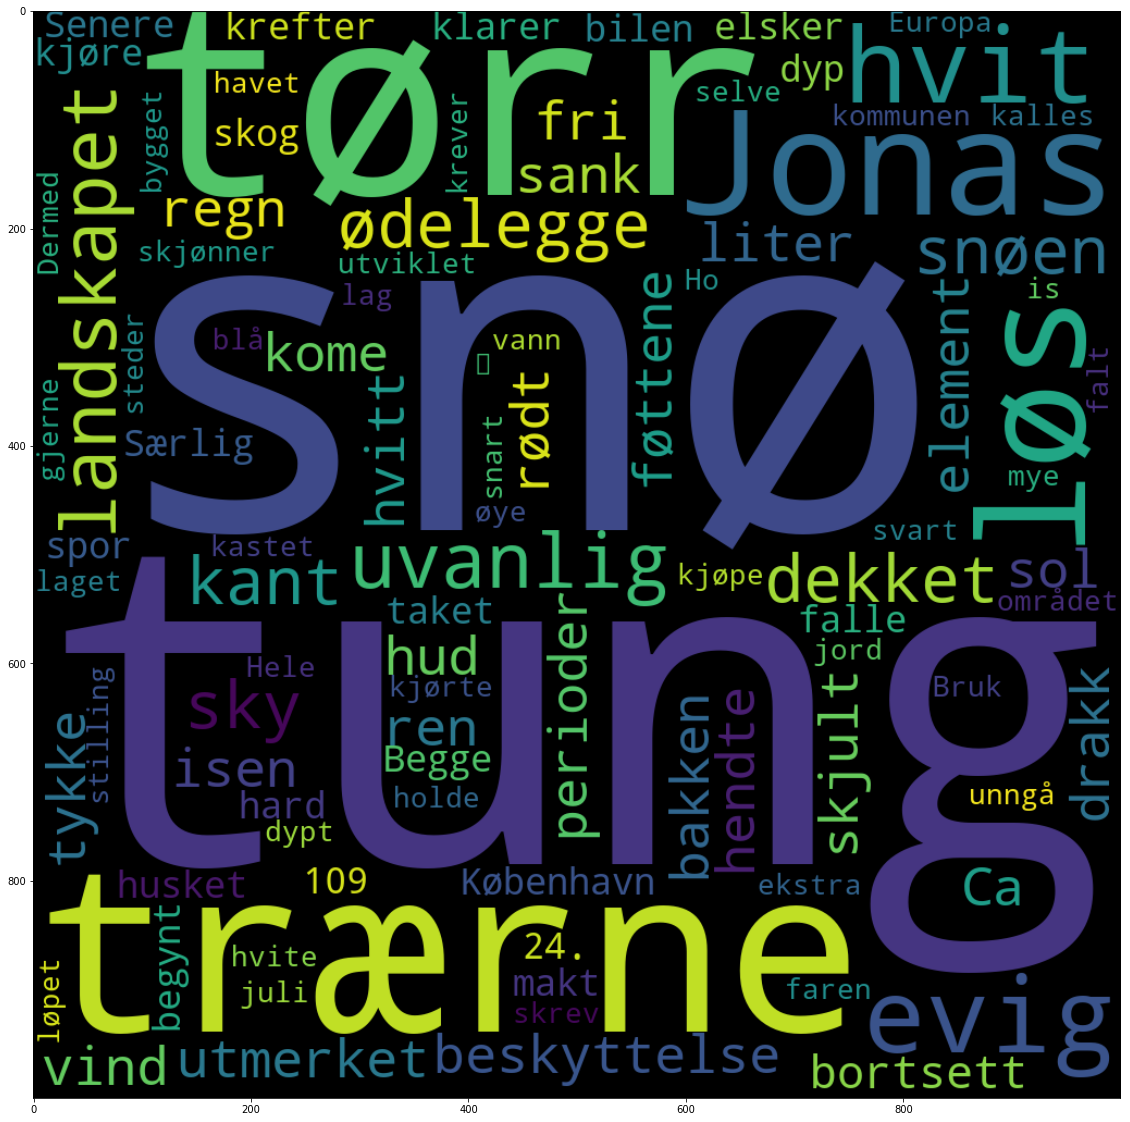

In [33]:
nb.cloud(diff[:100])

# Dokument-term-matriser

### Analyse - viktigste ord

Bygg et korpus

In [38]:
URNer = nb.get_urn({'ddk':"641%", 'year':1960, 'next':60})

In [39]:
# hent term-matrisen med kommandoen nb.get_corpus_text( ... liste av urner ...)
dtm = nb.get_corpus_text([x[0] for x in URNer])

In [40]:
nb.heatmap(dtm.sort_values(by = dtm.columns[1], ascending = False)[:50])

,2011021403020,2015050648073,2013022738003,2016072848087,2016031048116,2009033104042,2011101208053,2016011207515,2016090648043,2010052003081
.,1173,1212,524,743,2192,3876,519,1655,3172,179
",",705,1167,227,460,1482,5144,601,2517,4471,45
og,720,880,267,699,1884,44,401,1776,2745,87
i,750,624,368,553,1231,46,272,1146,1868,88
med,365,489,122,375,726,18,170,790,1166,40
),70,359,59,85,95,1495,154,334,472,9
-,99,349,49,117,213,525,4,252,486,24
(,67,345,62,85,94,1413,54,334,468,9
du,245,312,0,120,24,1,0,365,62,10
av,285,308,101,125,321,49,68,420,1181,19


## Bruk Corpus-klassen

### Eksempel 1

Bygg korpus med kommandoen `nb.Corpus(... metadata ...)`.

In [41]:
korpus = nb.Corpus(ddk='641%', period = (1990, 2010))

Det lages implisitt et referansekorpus fra samme periode som det sammenlignes med

In [ ]:
korpus.difference(doc_exp = 1.1, freq_exp = 1.1)

Lag en ordsky:

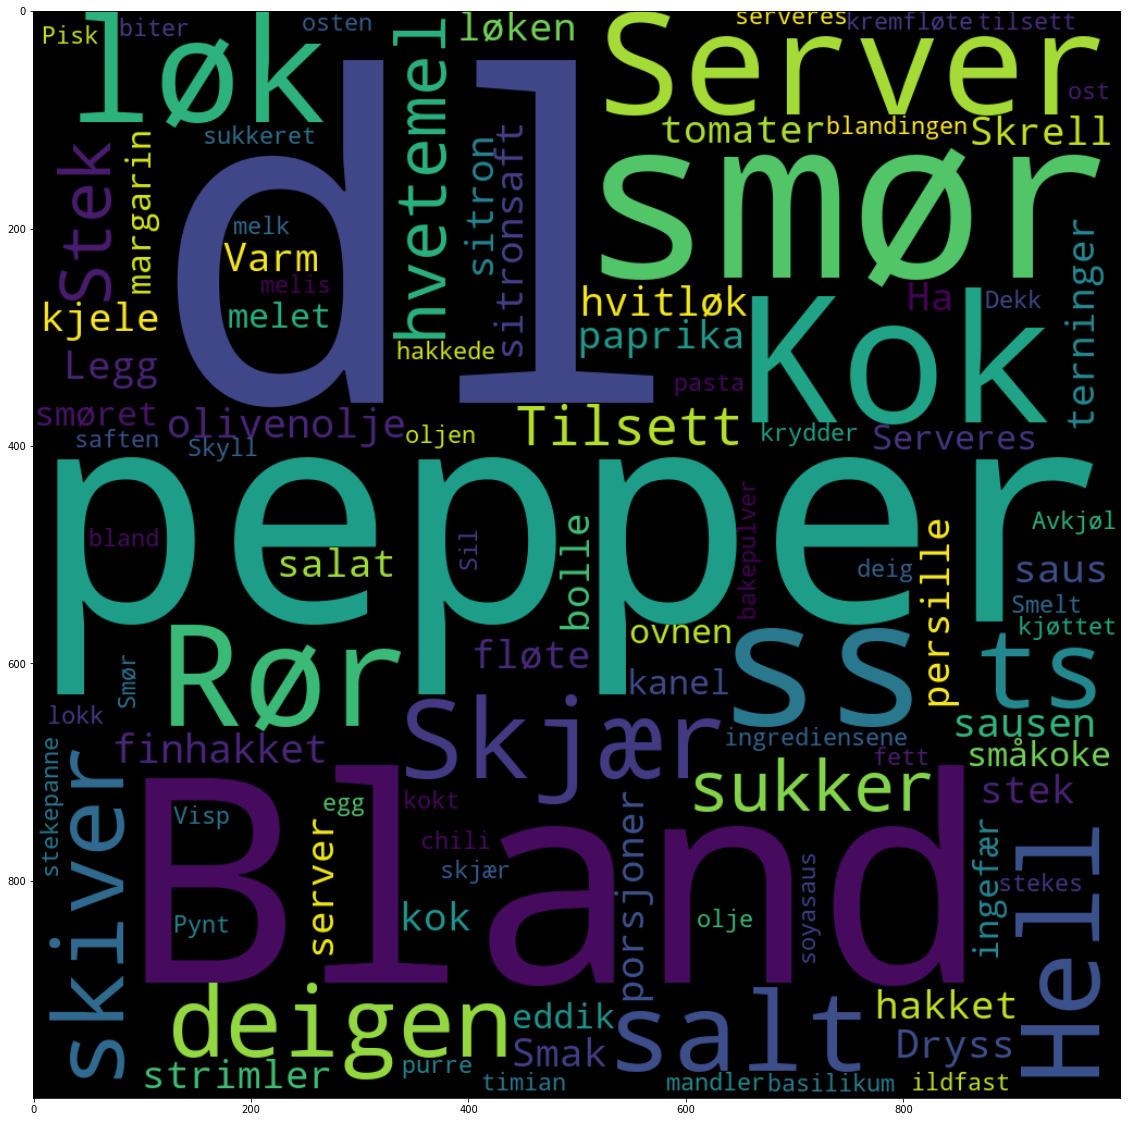

In [ ]:
nb.cloud(korpus.difference(doc_exp=1.1, freq_exp=1.1, aslist=False)[:100])

In [ ]:
korpus1 = nb.Corpus(ddk='700%', period = (1990, 2010))

In [ ]:
korpus1.difference(doc_exp = 1.1, freq_exp = 1.1)

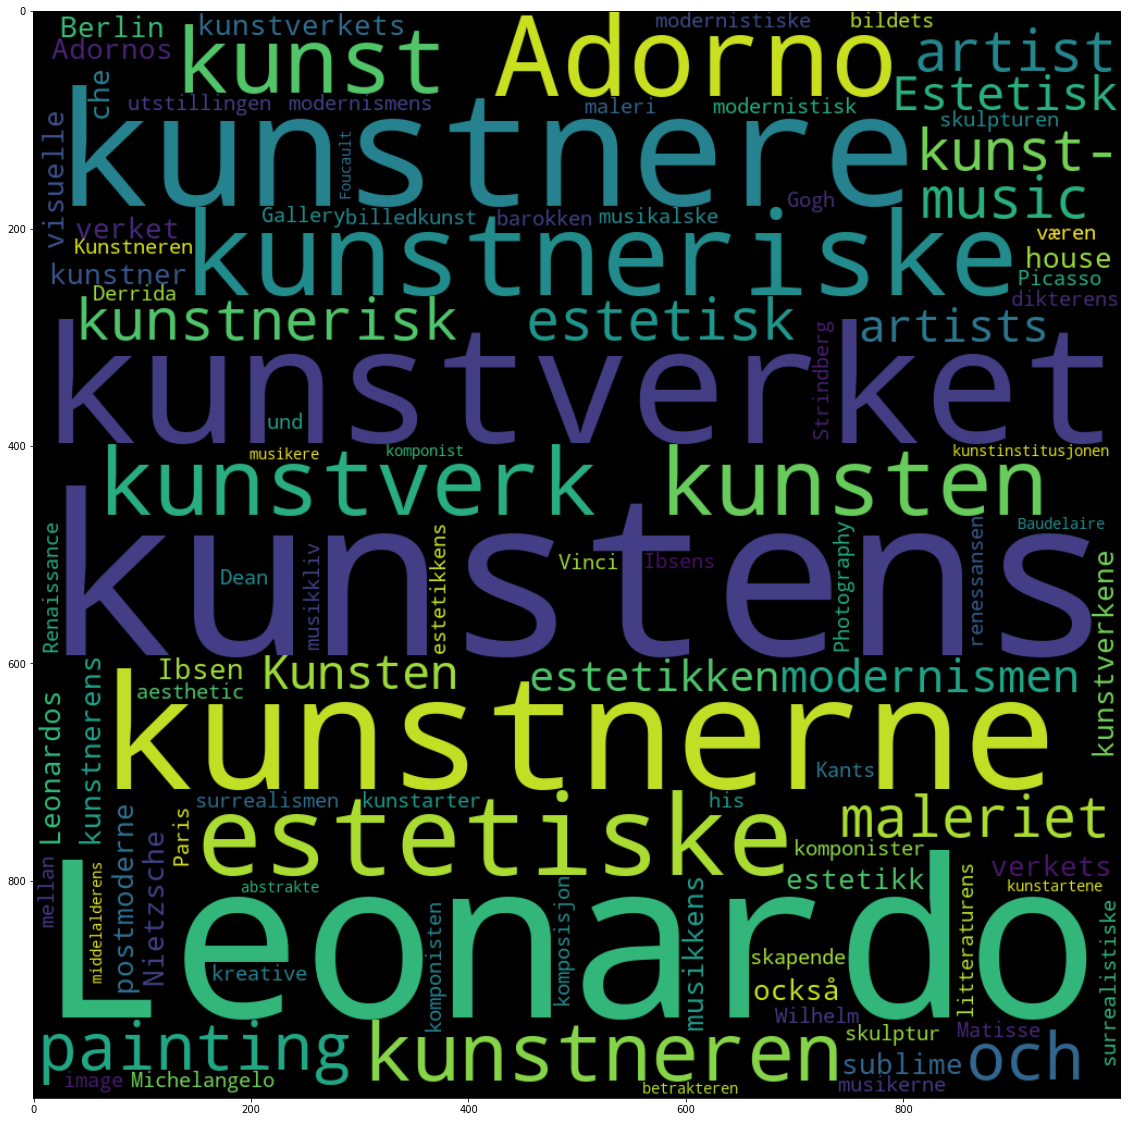

In [ ]:
nb.cloud(korpus1.difference(doc_exp=1.1, freq_exp=1.1, aslist=False)[:100])

### Eksempel 2

In [ ]:
korpus2 = nb.Corpus(ddk='230%', period = (1990, 2010))

In [ ]:
korpus2.difference(doc_exp = 1.1, freq_exp = 1.1)

In [ ]:
nb.cloud(korpus2.difference(doc_exp=1.1, freq_exp=1.1, aslist=False)[:100])

In [ ]:
korpus3 = nb.Corpus(ddk='004%', period = (1990, 2010))

In [ ]:
nb.cloud(korpus3.difference(doc_exp=1.1, freq_exp=1.1, aslist=False)[:100])